In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.calibration import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

In [64]:
print(tf.__version__)
print(keras.__version__)

2.19.0
3.9.2


In [65]:
try:
  drive_path
except NameError:
  drive_path = ''

data = pd.read_csv(drive_path + "run_data_meta.csv")

# Data Exploration


Check for missing values, data types, and summary statistics.

In [66]:
data.shape

(1832, 26)

In [67]:
data.head(5)

sub_id        datestring              filename   speed_r  age  Height  \
0  100433   5/10/2010 13:22  20101005T132240.json  1.610861   53     NaN   
1  100434  17/11/2010 13:22  20101117T132240.json  2.237294   51     NaN   
2  100537    3/7/2012 10:25  20120703T102550.json  2.127441  255   173.1   
3  100560   17/7/2012 10:37  20120717T103748.json  2.657365   33   179.3   
4  101481   17/7/2012 10:50  20120717T105021.json  2.625088   32   176.3   

   Weight   Gender DominantLeg                             InjDefn  ...  \
0     NaN  Unknown         NaN  Training volume/intensity affected  ...   
1     NaN   Female         NaN  Training volume/intensity affected  ...   
2    67.6   Female       Right          2 workouts missed in a row  ...   
3    83.0   Female       Right                           No injury  ...   
4    58.6   Female         NaN                           No injury  ...   

  SpecInjury2                                    Activities         Level  \
0         NaN  walking, horseback riding, strength training  Recreational   
1         NaN                             running, swimming  Recreational   
2         NaN                hiking, power walking, pilates  Recreational   
3         NaN                                          Yoga  Recreational   
4         NaN                                           NaN           NaN   

   YrsRunning              RaceDistance RaceTimeHrs RaceTimeMins RaceTimeSecs  \
0        13.0                       10k         NaN          NaN          NaN   
1        20.0  Casual Runner (no times)         NaN          NaN          NaN   
2         2.0  Casual Runner (no times)         NaN          NaN          NaN   
3         NaN  Casual Runner (no times)         NaN          NaN          NaN   
4         NaN                       NaN         NaN          NaN          NaN   

  YrPR  NumRaces  
0  NaN       NaN  
1  NaN       NaN  
2  NaN       NaN  
3  NaN       NaN  
4  NaN       NaN  

[5 rows x 26 columns]

In [68]:
#check data type and missing values
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sub_id        1832 non-null   int64  
 1   datestring    1832 non-null   object 
 2   filename      1832 non-null   object 
 3   speed_r       1832 non-null   float64
 4   age           1832 non-null   int64  
 5   Height        1829 non-null   float64
 6   Weight        1830 non-null   float64
 7   Gender        1832 non-null   object 
 8   DominantLeg   1480 non-null   object 
 9   InjDefn       1752 non-null   object 
 10  InjJoint      1598 non-null   object 
 11  InjSide       1346 non-null   object 
 12  SpecInjury    1243 non-null   object 
 13  InjDuration   405 non-null    float64
 14  InjJoint2     836 non-null    object 
 15  InjSide2      822 non-null    object 
 16  SpecInjury2   320 non-null    object 
 17  Activities    1516 non-null   object 
 18  Level         1563 non-null 

sub_id             0
datestring         0
filename           0
speed_r            0
age                0
Height             3
Weight             2
Gender             0
DominantLeg      352
InjDefn           80
InjJoint         234
InjSide          486
SpecInjury       589
InjDuration     1427
InjJoint2        996
InjSide2        1010
SpecInjury2     1512
Activities       316
Level            269
YrsRunning       517
RaceDistance     338
RaceTimeHrs      853
RaceTimeMins     807
RaceTimeSecs     908
YrPR            1407
NumRaces        1328
dtype: int64

In [69]:
#summary statistics
data.describe()

sub_id      speed_r          age       Height       Weight  \
count    1832.000000  1832.000000  1832.000000  1829.000000  1830.000000   
mean   122721.658843     2.760160    38.170306   173.051919    71.017223   
std     41154.448668     0.477627    13.145301    29.675143    37.466057   
min    100001.000000     1.172048    18.000000     0.000000     0.000000   
25%    100608.750000     2.482615    28.000000   165.200000    60.000000   
50%    101256.000000     2.721310    37.000000   172.700000    69.100000   
75%    101795.250000     2.933408    47.000000   179.000000    78.400000   
max    201225.000000     4.876998   255.000000   999.000000  1564.000000   

        InjDuration   YrsRunning         YrPR    NumRaces  
count    405.000000  1315.000000   425.000000  504.000000  
mean     450.471605    49.122624  1930.315294    5.329365  
std     1662.403237   191.117688   394.518125    5.480369  
min        0.000000     0.000000     0.000000    0.000000  
25%       60.000000     3.250000  2012.000000    2.000000  
50%      120.000000     8.000000  2012.000000    4.000000  
75%      365.000000    15.000000  2012.000000    8.000000  
max    30000.000000   999.000000  2016.000000   30.000000

# Handle Missing Values

The RaceTimeHrs, RaceTimeMins, and RaceTimeSecs is represented as HH,MM and SS. So we replace them to Nan

In [70]:
# Replace placeholders with NaN
data['RaceTimeHrs'] = data['RaceTimeHrs'].replace('HH', np.nan)
data['RaceTimeMins'] = data['RaceTimeMins'].replace('MM', np.nan)

# Convert columns to numeric (will convert non-convertible to NaN)
data['RaceTimeHrs'] = pd.to_numeric(data['RaceTimeHrs'], errors='coerce')
data['RaceTimeMins'] = pd.to_numeric(data['RaceTimeMins'], errors='coerce')

In [71]:
# Drop columns with excessive missing values or impute them
data = data.drop(columns=['InjJoint2', 'InjSide2', 'SpecInjury2','filename', 'datestring', 'YrPR', 'NumRaces', 'RaceTimeSecs', 'InjDuration', 'sub_id', 'speed_r', 'DominantLeg'])  # Example of dropping irrelevant columns

# Fill missing numerical values with mean or median
data['Height'] = data['Height'].fillna(data['Height'].mean())
data['Weight'] = data['Weight'].fillna(data['Weight'].mean())
data['YrsRunning'] = data['YrsRunning'].fillna(data['YrsRunning'].mean())

# Fill categorical columns with mode
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
#data['DominantLeg'] = data['DominantLeg'].fillna(data['DominantLeg'].mode()[0])
data['InjDefn'] = data['InjDefn'].fillna(data['InjDefn'].mode()[0])
data['InjJoint'] = data['InjJoint'].fillna(data['InjJoint'].mode()[0])
data['InjSide'] = data['InjSide'].fillna(data['InjSide'].mode()[0])
data['SpecInjury'] = data['SpecInjury'].fillna(data['SpecInjury'].mode()[0])
data['Activities'] = data['Activities'].fillna(data['Activities'].mode()[0])
data['Level'] = data['Level'].fillna(data['Level'].mode()[0])
data['RaceDistance'] = data['RaceDistance'].fillna(data['RaceDistance'].mode()[0])
data['RaceTimeHrs'] = data['RaceTimeHrs'].fillna(data['RaceTimeHrs'].median())
data['RaceTimeMins'] = data['RaceTimeMins'].fillna(data['RaceTimeMins'].median())








In [72]:
data.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1832 non-null   int64  
 1   Height        1832 non-null   float64
 2   Weight        1832 non-null   float64
 3   Gender        1832 non-null   object 
 4   InjDefn       1832 non-null   object 
 5   InjJoint      1832 non-null   object 
 6   InjSide       1832 non-null   object 
 7   SpecInjury    1832 non-null   object 
 8   Activities    1832 non-null   object 
 9   Level         1832 non-null   object 
 10  YrsRunning    1832 non-null   float64
 11  RaceDistance  1832 non-null   object 
 12  RaceTimeHrs   1832 non-null   float64
 13  RaceTimeMins  1832 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 200.5+ KB


Check missing values


In [73]:
data.isnull().sum()

age             0
Height          0
Weight          0
Gender          0
InjDefn         0
InjJoint        0
InjSide         0
SpecInjury      0
Activities      0
Level           0
YrsRunning      0
RaceDistance    0
RaceTimeHrs     0
RaceTimeMins    0
dtype: int64

# Feature Engineering


In [74]:
# Calculate BMI (Body Mass Index)
data['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)

# combine into total race time in minutes
data['TotalRaceTimeMins'] = data['RaceTimeHrs'] * 60 + data['RaceTimeMins']

# Drop original columns
data = data.drop(columns=['RaceTimeHrs', 'RaceTimeMins', 'Weight', 'Height'])

# Convert categorical columns to numeric using label encoding
categorical_columns = ['Gender', 'Activities', 'Level', 'InjDefn', 'InjSide', 'InjJoint', 'SpecInjury', 'RaceDistance']
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col].astype(str))


# Outlier Detection and Removal


In [75]:
# Remove outliers based on IQR for numerical columns
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data = remove_outliers(data, 'BMI')
data = remove_outliers(data, 'YrsRunning')
data = remove_outliers(data, 'TotalRaceTimeMins')


# Data Visualization

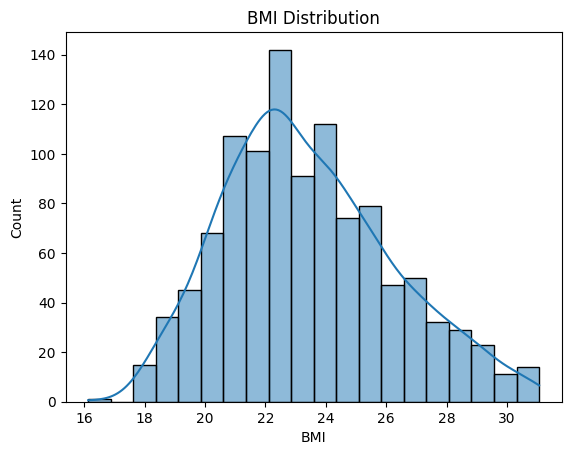

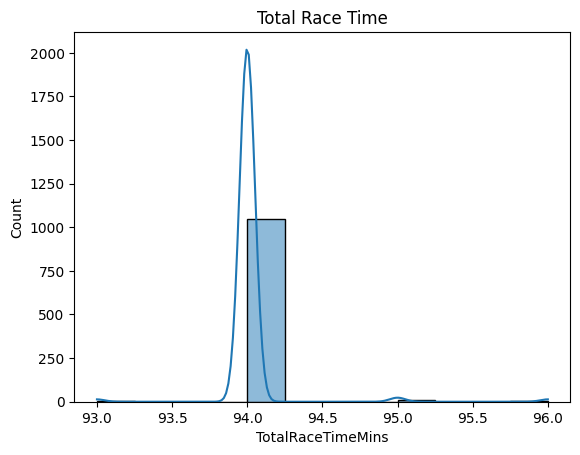

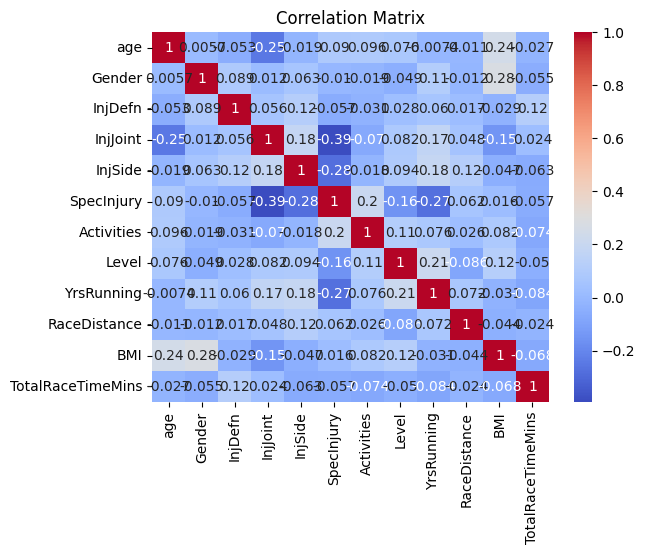

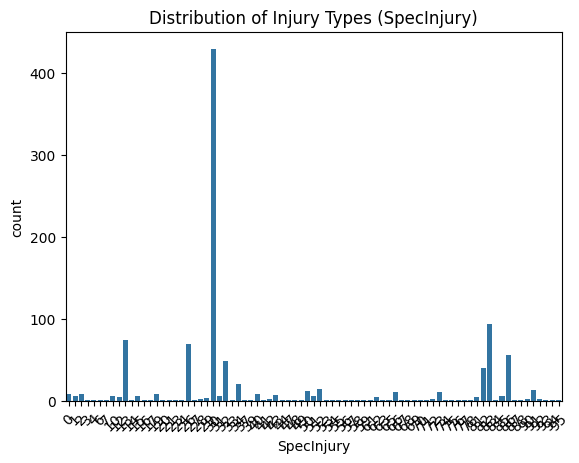

In [76]:

# Visualize distributions of numerical features
sns.histplot(data['BMI'], kde=True)
plt.title('BMI Distribution')
plt.show()

sns.histplot(data['TotalRaceTimeMins'], kde=True)
plt.title('Total Race Time')
plt.show()

# Correlation heatmap for numerical features
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize target distribution
sns.countplot(x='SpecInjury', data=data)
plt.title('Distribution of Injury Types (SpecInjury)')
plt.xticks(rotation=45)
plt.show()



# Drop Rare Classes

In [77]:
# Count class frequencies
value_counts = data['SpecInjury'].value_counts()

# Keep only classes with at least 2 samples
valid_classes = value_counts[value_counts >= 2].index

# Filter dataset
data = data[data['SpecInjury'].isin(valid_classes)]


# Split Dataset for Training and Testing

In [78]:
# Re-encode SpecInjury to be from 0 to N-1
le = LabelEncoder()
data['SpecInjury'] = le.fit_transform(data['SpecInjury'])


from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(data.drop(columns=['SpecInjury']), data['SpecInjury']):
    X_train = data.drop(columns=['SpecInjury']).iloc[train_index]
    X_test = data.drop(columns=['SpecInjury']).iloc[test_index]
    y_train = data['SpecInjury'].iloc[train_index]
    y_test = data['SpecInjury'].iloc[test_index]



# Call


In [79]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Model Development and Evaluation

# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)

best_rf_model = grid_search_rf.best_estimator_
best_rf_pred = best_rf_model.predict(X_test_scaled)
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)

print(f"Optimized Random Forest Accuracy: {best_rf_accuracy * 100:.2f}%")



c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Optimized Random Forest Accuracy: 69.38%


# Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'newton-cg', 'saga'],  # Solvers that support multinomial
    'penalty': ['l2', 'none'],  # L2 regularization or none
    'max_iter': [1000, 2000]  # Make sure it converges
}

# Create GridSearchCV
grid_search_lr = GridSearchCV(
    LogisticRegression(multi_class='multinomial', random_state=42),
    param_grid,
    cv=5,  # 5-fold cross validation
    verbose=2,
    n_jobs=-1
)

# Fit on training data
grid_search_lr.fit(X_train_scaled, y_train)

# Best model
best_lr_model = grid_search_lr.best_estimator_

# Predict
y_pred_best_lr = best_lr_model.predict(X_test_scaled)

# Evaluate
print(f"Best Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_best_lr) * 100:.2f}%")
print("Best Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_best_lr))



Fitting 5 folds for each of 60 candidates, totalling 300 fits


c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Logistic Regression Accuracy: 58.85%
Best Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.79      0.73      0.76        15
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          13       0.71      0.86      0.77        14
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       0.69      0.92      0.79        86
          17       1.00      1.00      1.00         1
          18       0.22      0.20      0.21        10
          19       0.00      0.00      0.00         4
          21       0.00      0.00      0.00 

c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_para

# XGBoost


In [82]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define a tighter parameter grid (GridSearch tries every combination)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 2]
}

# Create the base XGBoost model
xgb_base = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softprob',  # multiclass classification
    num_class=len(np.unique(y_train))
)

# Grid Search
xgb_grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model
xgb_grid_search.fit(X_train, y_train)

# Best model after tuning
best_xgb_model_grid = xgb_grid_search.best_estimator_

# Predict on test set
y_pred_xgb_grid = best_xgb_model_grid.predict(X_test)

# Evaluate
print("XGBoost Accuracy after GridSearchCV:", accuracy_score(y_test, y_pred_xgb_grid))
print("XGBoost Classification Report after GridSearchCV:\n", classification_report(y_test, y_pred_xgb_grid))





Fitting 3 folds for each of 256 candidates, totalling 768 fits


c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
512 fits failed out of a total of 768.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
256 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mudhr\OneDrive\Pictures\fyp co

XGBoost Accuracy after GridSearchCV: 0.6698564593301436
XGBoost Classification Report after GridSearchCV:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.83      1.00      0.91        15
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         0
          13       0.93      1.00      0.97        14
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       0.83      1.00      0.91        86
          17       0.00      0.00      0.00         1
          18       0.33      0.40      0.36        10
          19       0.00     

c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

# Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(valid_classes), activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.0005)  # Lower learning rate often helps
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=64,  # Larger batch size
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


# LightGBM RandomizedSearch

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
import numpy as np

# Define the parameter grid
param_dist = {
    'num_leaves': np.arange(20, 150, 10),
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500, 1000],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
}

# Initialize the base model
lgb_base = LGBMClassifier(
    objective='multiclass',
    num_class=len(valid_classes),
    boosting_type='gbdt',
    random_state=42
)

# Setup RandomizedSearchCV
lgb_random_search = RandomizedSearchCV(
    estimator=lgb_base,
    param_distributions=param_dist,
    n_iter=50,  # Try 50 random combinations
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
lgb_random_search.fit(X_train_scaled, y_train)

# Best model
best_lgb_model_random = lgb_random_search.best_estimator_

# Predict
y_pred_lgb_random = best_lgb_model_random.predict(X_test_scaled)

# Evaluate
lgb_accuracy_random = accuracy_score(y_test, y_pred_lgb_random)
print(f"LightGBM RandomizedSearch Accuracy: {lgb_accuracy_random * 100:.2f}%")
print("LightGBM Classification Report (RandomizedSearch):\n", classification_report(y_test, y_pred_lgb_random))



c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000699 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 836, number of used features: 10
[LightGBM] [Info] Start training from score -4.782718
[LightGBM] [Info] Start training from score -5.119191
[LightGBM] [Info] Start training from score -4.782718
[LightGBM] [Info] Start training from score -6.035481
[LightGBM] [Info] Start training from score -6.035481
[LightGBM] [Info] Start training from score -5.119191
[LightGBM] [Info] Start training from score -5.342334
[LightGBM] [Info] Start training from score -2.634284
[LightGBM] [Info] Start training from score -6.035481
[LightGBM] [Info] Start training from score -5.119191
[LightGBM] [Info] Start training from score -4.782718
[LightGBM] [Info] Start training from score -6.035481
[Lig

c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM RandomizedSearch Accuracy: 68.42%
LightGBM Classification Report (RandomizedSearch):
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.82      0.93      0.88        15
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         0
          13       1.00      0.93      0.96        14
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       0.84      0.95      0.89        86
          17       0.00      0.00      0.00         1
          18       0.67      0.60      0.63        10
          19       0.50      0.50      0

c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

# ENSEMBLE


Voting Classifier


In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a VotingClassifier with the three models
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', best_rf_model),
        ('xgb', best_xgb_model_grid),
        ('lgb', best_lgb_model_random),
        
    ],
    voting='soft'  # Use soft voting to average probabilities
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {ensemble_accuracy * 100:.2f}%")
print("Ensemble Model Classification Report:\n", classification_report(y_test, y_pred_ensemble))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 836, number of used features: 10
[LightGBM] [Info] Start training from score -4.782718
[LightGBM] [Info] Start training from score -5.119191
[LightGBM] [Info] Start training from score -4.782718
[LightGBM] [Info] Start training from score -6.035481
[LightGBM] [Info] Start training from score -6.035481
[LightGBM] [Info] Start training from score -5.119191
[LightGBM] [Info] Start training from score -5.342334
[LightGBM] [Info] Start training from score -2.634284
[LightGBM] [Info] Start training from score -6.035481
[LightGBM] [Info] Start training from score -5.119191
[LightGBM] [Info] Start training from score -4.782718
[LightGBM] [Info] Start training from score -6.035481
[LightGBM] [Info] Start training from score -6.035481
[LightGBM] [

c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Ensemble Model Accuracy: 69.38%
Ensemble Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.83      1.00      0.91        15
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       0.85      0.95      0.90        86
          17       0.00      0.00      0.00         1
          18       0.60      0.60      0.60        10
          19       0.50      0.50      0.50         4
          21       0.00      0.00      0.00         2
          

c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mudhr\OneDrive\Pictures\fyp code\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [101]:
# Dictionary to store model names and their accuracies
model_accuracies = {
    "Random Forest": best_rf_accuracy,
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "Neural Network": test_accuracy,
    "Naive Bayes": nb_accuracy,
    "LightGBM": lgb_accuracy_random,
    "Ensemble (Random Forest, XGBoost, LightGBM)": ensemble_accuracy
}

# Display the accuracies
for model, accuracy in model_accuracies.items():
    print(f"{model} Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 69.38%
Logistic Regression Accuracy: 58.85%
XGBoost Accuracy: 66.99%
Neural Network Accuracy: 59.33%
Naive Bayes Accuracy: 18.66%
LightGBM Accuracy: 68.42%
Ensemble (Random Forest, XGBoost, LightGBM) Accuracy: 69.86%
